In [1]:
import torch
from lstm import PPO
from torch.distributions import Categorical
import numpy as np
import gymnasium as gym
from cell_env import CellEnv

In [2]:

env_args = {
    "max_timesteps": 200,
    "alpha_mem": 0.7,
    "dt": 0.5,
    "frame_stack": 1,
}

env = CellEnv(**env_args)
# use the monitor wrapper to log the results:


In [3]:
model = PPO()
score = 0.0
print_interval = 4
T_horizon = 20

for n_epi in range(10000):
    h_out = (torch.zeros([1, 1, 32], dtype=torch.float), torch.zeros([1, 1, 32], dtype=torch.float))
    s, _ = env.reset()
    done = False
    
    while not done:
        n_cells = 1000
        for t in range(T_horizon):
            h_in = h_out
            prob, h_out = model.pi(torch.from_numpy(s).float(), h_in)
            prob = prob.view(-1)
            m = Categorical(prob)
            a = m.sample().item()

            s_prime, r, terminated, truncated, info = env.step(a)
            n_cells = info['n_cells']

            done = terminated or truncated

            model.put_data((s, a, r/100.0, s_prime, prob[a].item(), h_in, h_out, done))
            s = s_prime
            score += r
            if done:
                print(n_cells)
                break
                
        model.train_net()

    if n_epi%print_interval==0 and n_epi!=0:
        print("# of episode :{}, avg score : {:.1f}".format(n_epi, score/print_interval))
        score = 0.0

env.close()


NameError: name 'info' is not defined

In [ ]:
cells = []
done = False

env.reset()
while not done:
    n_cells = 1000
    for t in range(T_horizon):
        h_in = h_out
        prob, h_out = model.pi(torch.from_numpy(s).float(), h_in)
        prob = prob.view(-1)
        m = Categorical(prob)
        a = m.sample().item()
        cells.append(info['n_cells'])

        s_prime, r, terminated, truncated, info = env.step(a)
        done = terminated or truncated

        model.put_data((s, a, r/100.0, s_prime, prob[a].item(), h_in, h_out, done))
        s = s_prime
        score += r
        if done:
            # print(n_cells)
            break


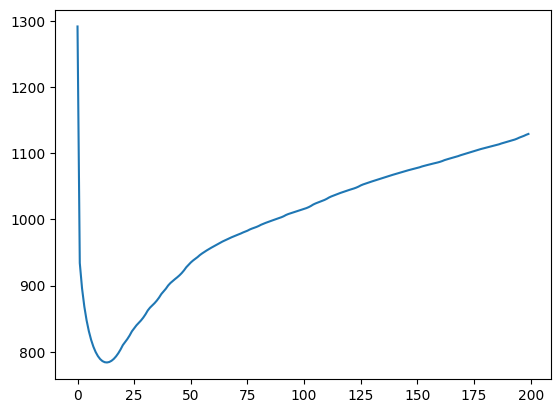

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cells)